In [2]:
import scipy.io
import numpy as np
import pylab as pl
from src.read_data import lire_alpha_digits
from src.principal_DNN_MNIST import DnnModel

In [3]:
mat = scipy.io.loadmat('data/binaryalphadigs.mat')
data_digits = mat['dat'][:10,]
data_alpha = mat['dat'][10:,]
print("data_digits shape = {}".format(data_digits.shape))
print("data_alpha shape = {}".format(data_alpha.shape))

data_digits shape = (10, 39)
data_alpha shape = (26, 39)


In [4]:
# def lire_alpha_digits(data, list_index):
#     m, n = data.shape
#     p, q = data[0, 0].shape
#     matrix = np.zeros((len(list_index)*n, p*q))
#     for i, index in enumerate(list_index):
#         for j in range(n):
#             matrix[i*n + j] = data[index, j].reshape(p*q)
#     return matrix

In [5]:
Xa = lire_alpha_digits(data_alpha, [0])
Xb = lire_alpha_digits(data_alpha, [1])
Xc = lire_alpha_digits(data_alpha, [2])
# data_digits_reshaped = lire_alpha_digits(data_digits, [0])

In [6]:
Xab = np.concatenate((Xa, Xb))
Xac = np.concatenate((Xa, Xc))
Xabc = np.concatenate((Xa, Xc, Xb))

In [7]:
dnn = DnnModel(d=3, p=320, q=150, n_classes=3)
dnn.pretrain_DNN(X=Xa, niter=150, step=0.01, batch=10)
dnn.pretrain_DNN(X=Xac, niter=150, step=0.01, batch=10)
dnn.pretrain_DNN(X=Xabc, niter=150, step=0.01, batch=10)

Training Layer 1/3 ...
Training Layer 2/3 ...
Training Layer 3/3 ...
Training Layer 1/3 ...
Training Layer 2/3 ...
Training Layer 3/3 ...
Training Layer 1/3 ...
Training Layer 2/3 ...
Training Layer 3/3 ...


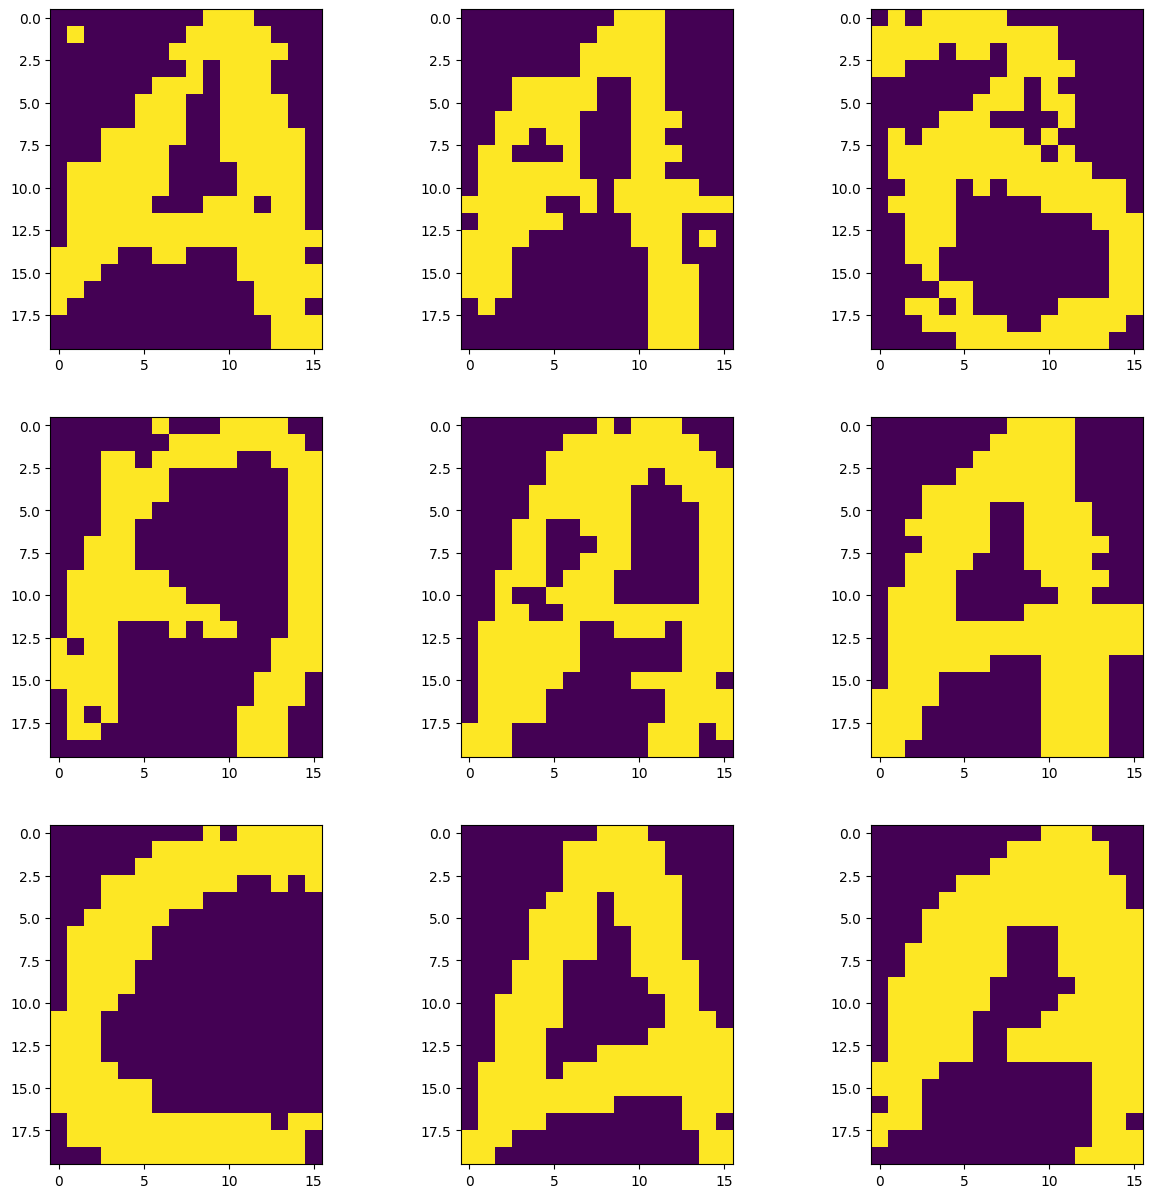

In [8]:
gen = dnn.generer_image_DBN(9, 10)

fig, ax = pl.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(gen[3*i + j,:].reshape(20, 16))

In [9]:
Xabc = np.concatenate((Xa, Xb, Xc))

In [10]:
y = np.concatenate((np.zeros(39), np.ones(39), 2*np.ones(39))).astype(int)

In [11]:
dnn.train_DNN(Xabc, y, n_epochs=50, epsilon=0.01, batch=10, verbose=True)

Epoch 0/50 : Accuracy score = 0.7264957264957265
Epoch 1/50 : Accuracy score = 0.7350427350427351
Epoch 2/50 : Accuracy score = 0.7264957264957265
Epoch 3/50 : Accuracy score = 0.7264957264957265
Epoch 4/50 : Accuracy score = 0.717948717948718
Epoch 5/50 : Accuracy score = 0.717948717948718
Epoch 6/50 : Accuracy score = 0.717948717948718
Epoch 7/50 : Accuracy score = 0.7094017094017094
Epoch 8/50 : Accuracy score = 0.7008547008547008
Epoch 9/50 : Accuracy score = 0.7008547008547008
Epoch 10/50 : Accuracy score = 0.7094017094017094
Epoch 11/50 : Accuracy score = 0.7094017094017094
Epoch 12/50 : Accuracy score = 0.7094017094017094
Epoch 13/50 : Accuracy score = 0.7094017094017094
Epoch 14/50 : Accuracy score = 0.7094017094017094
Epoch 15/50 : Accuracy score = 0.717948717948718
Epoch 16/50 : Accuracy score = 0.717948717948718
Epoch 17/50 : Accuracy score = 0.7350427350427351
Epoch 18/50 : Accuracy score = 0.7435897435897436
Epoch 19/50 : Accuracy score = 0.7435897435897436
Epoch 20/50 : A

In [12]:
y_hat = dnn.predict(Xabc)

In [13]:
np.mean(y==y_hat)

0.9572649572649573

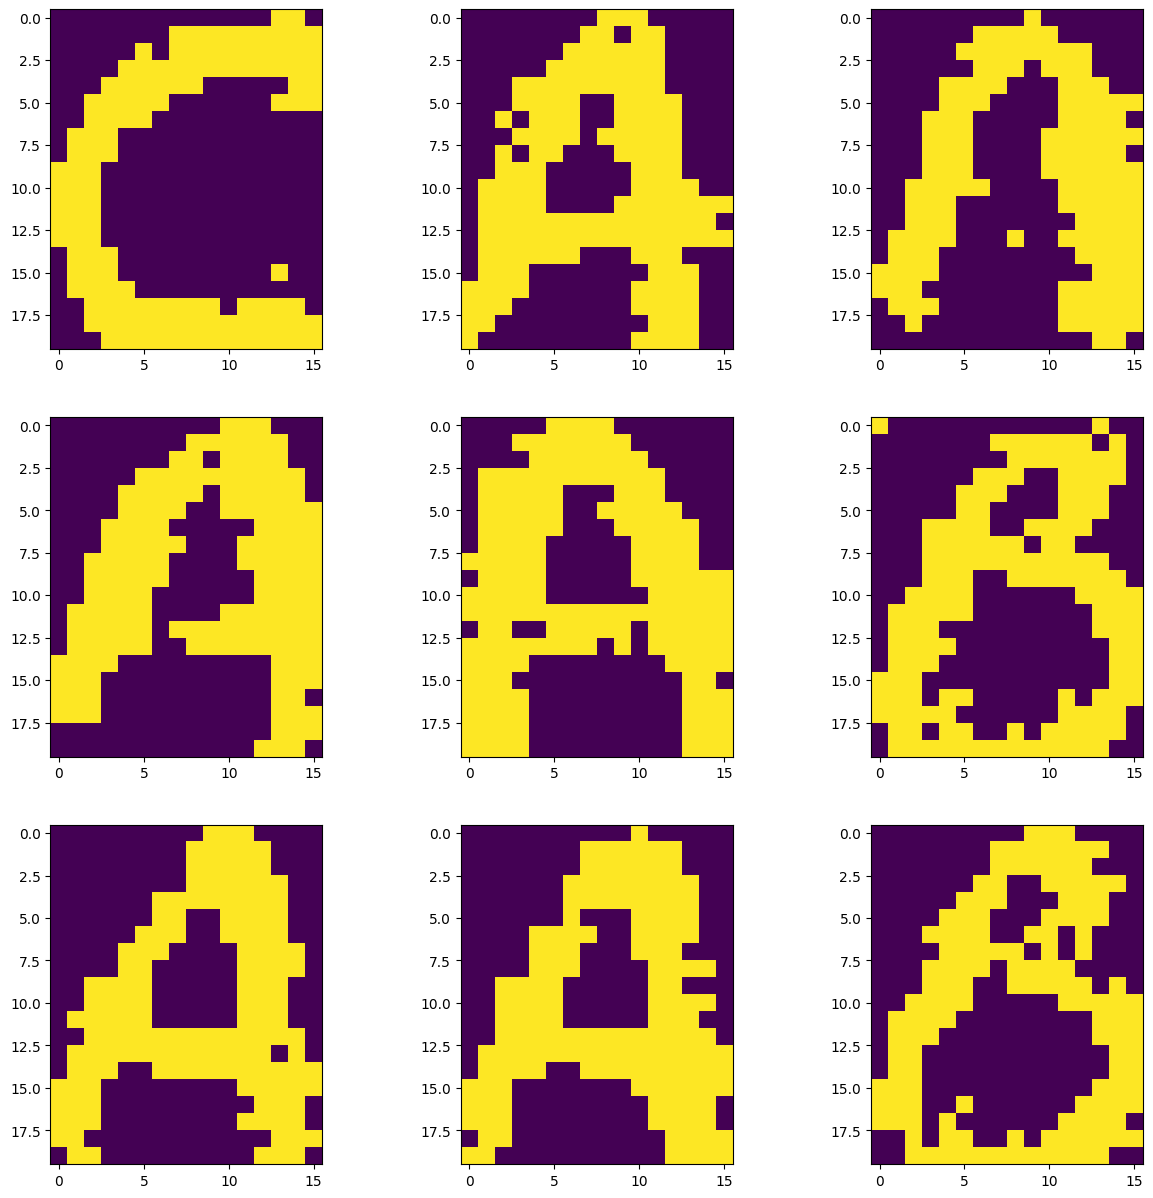

In [14]:
gen = dnn.generer_image_DBN(9, 10)

fig, ax = pl.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(gen[3*i + j,:].reshape(20, 16))